# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural newworks for classification problems

A classification is where you try to classify something as one thing or another

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create curcles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check out labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is a little hard to understand right now... let's visualize it!

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


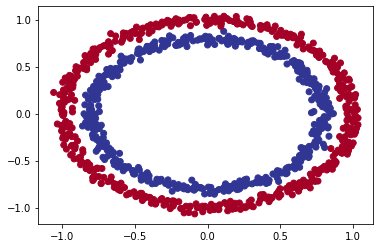

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1],c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working 
len(X), len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [9]:
import tensorflow as tf


In [10]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 3s 18ms/step - loss: 5.9119 - accuracy: 0.4860
Epoch 2/5
32/32 [==============================] - 1s 24ms/step - loss: 5.8987 - accuracy: 0.4850
Epoch 3/5
32/32 [==============================] - 1s 16ms/step - loss: 5.8937 - accuracy: 0.4850
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 5.8918 - accuracy: 0.4840
Epoch 5/5
32/32 [==============================] - 0s 10ms/step - loss: 5.8893 - accuracy: 0.4850


In [11]:
# Let's try and improve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose=0)

In [12]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 3.1048 - accuracy: 0.4840


[3.104766368865967, 0.48399999737739563]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if its guessing.  So let's step things up a notch and add an extra layer.

In [13]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [14]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7224 - accuracy: 0.4460


[0.7224361300468445, 0.44600000977516174]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might want to add more layers or increase the number of hidden units within a layer.
2. Compile a model - here we might want to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer)

In [15]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [16]:
# Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.7002 - accuracy: 0.5050


[0.7001985311508179, 0.5049999952316284]

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [17]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting X.
  """
  #Degine the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.armax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())



313/313 [==============================] - 1s 2ms/step
doing binary classification


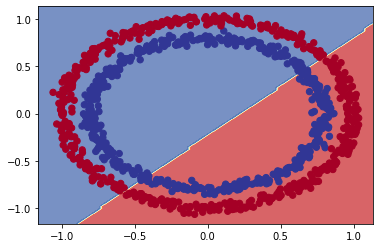

In [18]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X, 
                       y=y)

In [19]:
# Let's see if our model can be used for a regression problem.

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

X_regression, y_regression

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

In [21]:
# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs = 100)

Epoch 1/100


ValueError: ignored

We compiled our model for a binary classification problem.
But... we're now working on a regression problem, let's change the model to suit our data

In [22]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 293.8951 - mae: 293.8951
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 158.6774 - mae: 158.6774
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 55.7168 - mae: 55.7168
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 84.2474 - mae: 84.2474
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 77.3183 - mae: 77.3183
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 46.7129 - mae: 46.7129
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 48.3825 - mae: 48.3825
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 42.0104 - mae: 42.0104
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 43.5644 - mae: 43.5644
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 42.2357 - mae: 42.2357
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 7ms/step


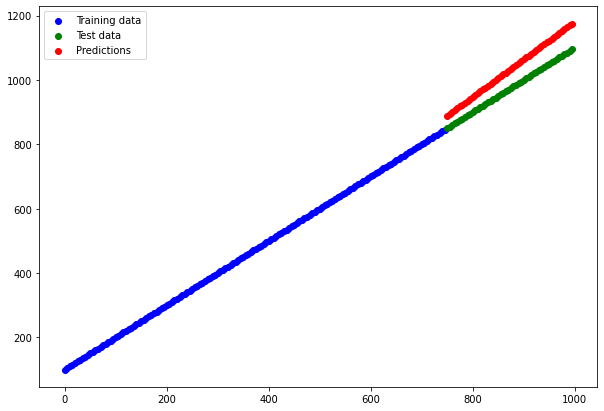

In [23]:
# Make prediction swith our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression model
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label = "Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label = "Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label = "Predictions")
plt.legend()

## The missing piece: Non-linearity

In [24]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation= tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.2842 - accuracy: 0.4390
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2389 - accuracy: 0.4470
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1851 - accuracy: 0.4490
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1475 - accuracy: 0.4520
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1172 - accuracy: 0.4550
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0935 - accuracy: 0.4580
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0311 - accuracy: 0.4570
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0000 - accuracy: 0.4580
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9835 - accuracy: 0.4600
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9652 - accuracy: 0.4600
Epoch 11/

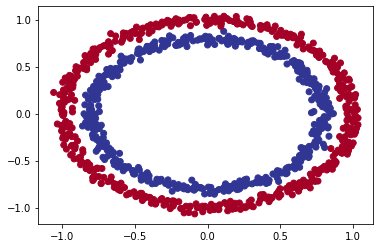

In [25]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 1s 1ms/step
doing binary classification


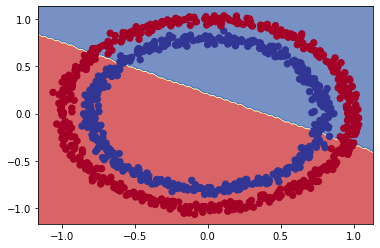

In [26]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Let's try building our first neural network with a non-linear activation function.

In [27]:
# Set the random seed
tf.random.set_seed(42)

# Create the model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation= tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3439 - accuracy: 0.4690
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3128 - accuracy: 0.4690
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2908 - accuracy: 0.4710
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2846 - accuracy: 0.4700
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2822 - accuracy: 0.4700
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2586 - accuracy: 0.4700
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2534 - accuracy: 0.4700
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2121 - accuracy: 0.4700
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1981 - accuracy: 0.4730
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1951 - accuracy: 0.4740
Epoch 11/

In [28]:
# Time to replicate the multi-layer neural network from TensorFlow playground

# Set the random seed
tf.random.set_seed(42)

# Create the model with a non-linear activation
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation= tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.relu)
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 3ms/step - loss: 4.0499 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 3.2426 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 2.9814 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 2.8077 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 2.5713 - accuracy: 0.4930
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 2.4715 - accuracy: 0.4670
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 2.4403 - accuracy: 0.4500
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 2.4048 - accuracy: 0.4700
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 2.3563 - accuracy: 0.4740
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 2.3299 - accuracy: 0.4770
Epoch 11/

In [29]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.4594 - accuracy: 0.7740


[0.4593757688999176, 0.7739999890327454]

313/313 [==============================] - 1s 2ms/step
doing binary classification


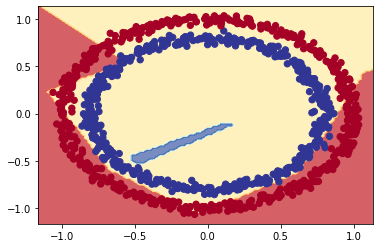

In [30]:
# How do our model predictions look?
plot_decision_boundary(model=model_6,
                       X=X, y=y)

In [31]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, tf.keras.activations.relu),
    tf.keras.layers.Dense(4, tf.keras.activations.relu),
    tf.keras.layers.Dense(1, tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6985 - accuracy: 0.4950
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.5010
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.4850
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.4880
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.4940
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6912 - accuracy: 0.5060
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6906 - accuracy: 0.5020
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6899 - accuracy: 0.5050
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6894 - accuracy: 0.5090
Epoch 11/

In [32]:
# 4. Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.4345 - accuracy: 0.8420


[0.4344533681869507, 0.8420000076293945]

313/313 [==============================] - 1s 2ms/step
doing binary classification


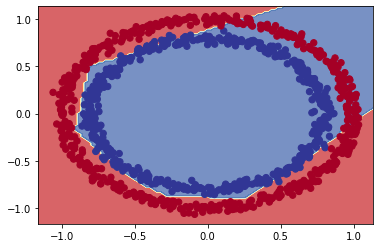

In [33]:
# Let's visualize our metrics
plot_decision_boundary(model=model_7,
                       X=X,
                       y=y)

**Question:** What's wrong with the predictions we've made? Are we really evaluating our model correctly?

**Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action

In [34]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

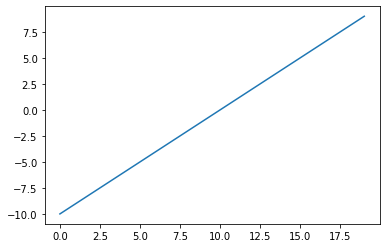

In [35]:
# Visualize our toy tensor
plt.plot(A);

In [36]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

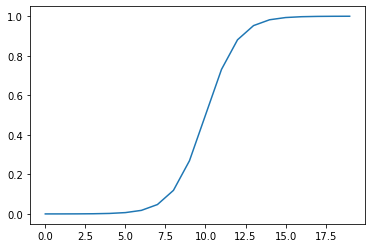

In [37]:
plt.plot(sigmoid(A))

In [38]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0,x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

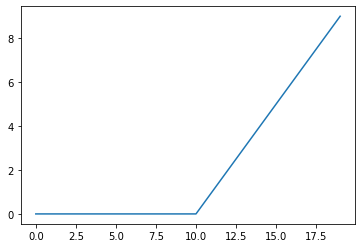

In [39]:
# Plot Relu-modified tensor
plt.plot(relu(A))

In [40]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

## Evaluating and improving our classification

So far we've been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So let's create a training and test set.

In [41]:
# Check how many examples we have
len(X)

1000

In [42]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [43]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 5ms/step - loss: 0.7049 - accuracy: 0.4700
Epoch 2/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6904 - accuracy: 0.5125
Epoch 3/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6802 - accuracy: 0.6125
Epoch 4/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6753 - accuracy: 0.6000
Epoch 5/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6706 - accuracy: 0.6288
Epoch 6/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6638 - accuracy: 0.5925
Epoch 7/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6550 - accuracy: 0.6313
Epoch 8/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6430 - accuracy: 0.6500
Epoch 9/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6247 - accuracy: 0.7713
Epoch 10/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6062 - accuracy: 0.7750
Epoch 11/25
25/25 [

In [44]:
# 4. Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.1274 - accuracy: 0.9750


[0.12741363048553467, 0.9750000238418579]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


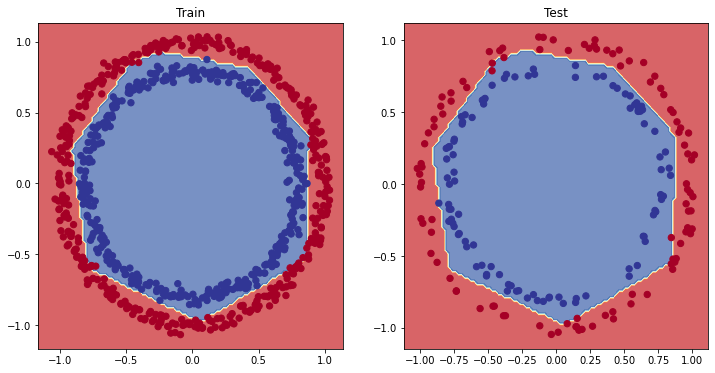

In [45]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

## Plot the loss (or training) curves

In [46]:
history.history

{'loss': [0.7048609852790833,
  0.6904491186141968,
  0.6802210211753845,
  0.6752882599830627,
  0.6706149578094482,
  0.6638379693031311,
  0.6550079584121704,
  0.6430380940437317,
  0.6247305870056152,
  0.6061862707138062,
  0.583168625831604,
  0.5559146404266357,
  0.5101161003112793,
  0.46215716004371643,
  0.41710948944091797,
  0.37112167477607727,
  0.3231913447380066,
  0.27911919355392456,
  0.24399839341640472,
  0.21861787140369415,
  0.1925206184387207,
  0.16917771100997925,
  0.15383006632328033,
  0.14352959394454956,
  0.13003525137901306],
 'accuracy': [0.4699999988079071,
  0.512499988079071,
  0.612500011920929,
  0.6000000238418579,
  0.6287500262260437,
  0.5924999713897705,
  0.6312500238418579,
  0.6499999761581421,
  0.7712500095367432,
  0.7749999761581421,
  0.7400000095367432,
  0.7212499976158142,
  0.7850000262260437,
  0.8112499713897705,
  0.8612499833106995,
  0.9075000286102295,
  0.925000011920929,
  0.9700000286102295,
  0.9762499928474426,
  0.9

In [47]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.704861,0.47000
1,0.690449,0.51250
2,0.680221,0.61250
3,0.675288,0.60000
4,0.670615,0.62875
5,0.663838,0.59250
6,0.655008,0.63125
7,0.643038,0.65000
8,0.624731,0.77125
9,0.606186,0.77500


Text(0.5, 1.0, 'Model_8 loss curves')

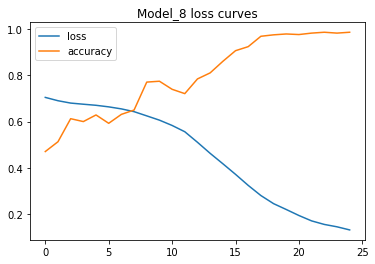

In [48]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

**Note:** For many problems, the loss functions going down means the model is improving, (the predictions it's makeing are getting ground truth labels

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while* its training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.

In [49]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the odel (passing lr_scheduler callback)
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7007 - accuracy: 0.5163 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7006 - accuracy: 0.5163 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7004 - accuracy: 0.5150 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7003 - accuracy: 0.5138 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7001 - accuracy: 0.5163 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6999 - accuracy: 0.5138 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6997 - accuracy: 0.5138 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6995 - accuracy: 0.5138 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

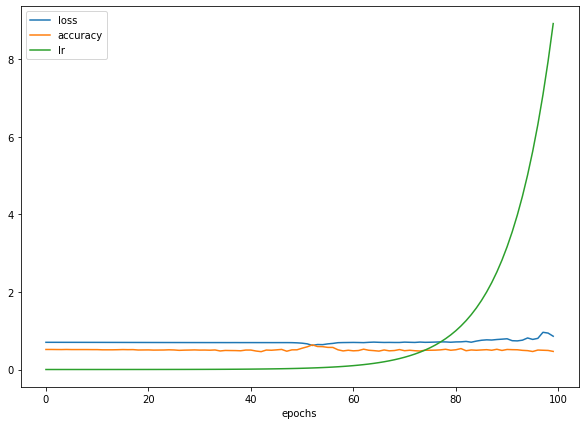

In [50]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs")

In [51]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

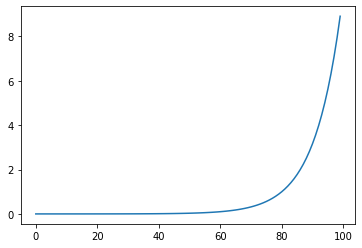

In [52]:
plt.plot(lrs)

Text(0.5, 1.0, 'Learning rate vs. Loss')

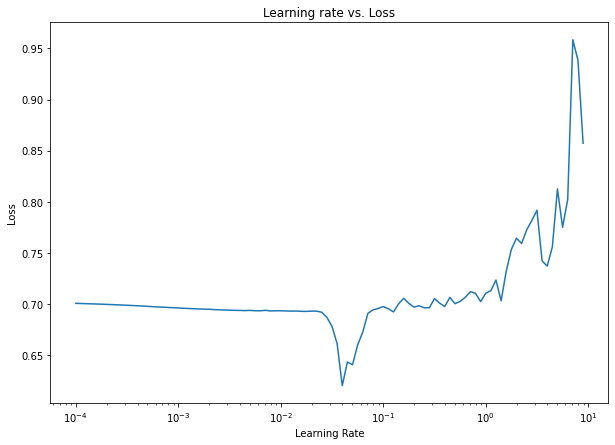

In [53]:
# Plot the learning rate bersus the loss
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

In [54]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

**Note:** The ideal learning rate will be located between the lowest point of the curve and the place where you see the model decrease in loss the fastest.  As shown in the example above, the ideal learning rate would be between 10-2 and 10-1

In [55]:
# Let's try using a higher *ideal* learning rate with the same model we used before

# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_10.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])

# Fit the odel (passing lr_scheduler callback)
history_10 = model_10.fit(X_train,
                        y_train,
                        epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.6882 - accuracy: 0.5200
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6769 - accuracy: 0.5700
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6619 - accuracy: 0.5825
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6332 - accuracy: 0.6438
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5955 - accuracy: 0.6712
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5258 - accuracy: 0.7750
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4632 - accuracy: 0.8225
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3626 - accuracy: 0.8712
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2142 - accuracy: 0.9688
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.1439 - accuracy: 0.9812
Epoch 11/20
25/25 [

In [56]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0241 - accuracy: 1.0000


[0.024144303053617477, 1.0]

In [57]:
# Evaluate model 8 on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1274 - accuracy: 0.9750


[0.12741363048553467, 0.9750000238418579]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


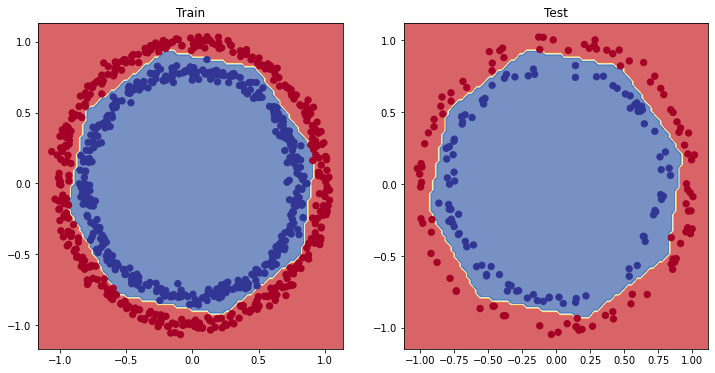

In [58]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # This means 1 row, 2 columns, 1st section
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2) # This means 1 row, 2 columns, 2nd section
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

## Classification evaluation methods

* **Accuracy:** Default metric for classification problems. Not the best for imbalanced classes (10000 for one class, 10 for another)
* **Precision:** Higher precision leads to less false positives (when a machine guesses positive or true, it is actually positive or true)
* **Recall:** Higher recall leads to less false negatives (when a machine guesses negative or false, it is actually negative or false)
 * **Note:** It is almost impossible to have both high precision and high recall (precision and recall tradeoff).  Due to this, understand what you want your model to aim for

* **F1-score:** Combination of precision and recall, usually a good metric for a classification model.

* **Confusion Matrix:** When comparing predictions to truth labels to see where model gets confused.  Can be hard to use with large numbers of classes.


## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should b familiar with:

* Accuracy
* Precision
* Recall
* F1-score
* Confusion Matrix
* Classification report (from scikit-learn)

In [59]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0241 - accuracy: 1.0000
Model loss on the test set: 0.024144303053617477
Model accuracy on the test set: 100.00%


How about a confusion matrix?

In [60]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)


7/7 [==============================] - 0s 3ms/step


ValueError: ignored

In [61]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [62]:
y_preds[:10]

array([[9.9239832e-01],
       [9.9732625e-01],
       [9.9850339e-01],
       [9.9823236e-01],
       [4.3423906e-01],
       [3.6054768e-03],
       [9.9825096e-01],
       [2.2557867e-04],
       [9.9683982e-01],
       [5.4990599e-04]], dtype=float32)

Looks like our predictions array has come out in **prediction probability** form... the standard output from the sigmoid (or softmax) activation functions.

In [63]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [64]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[101,   0],
       [  0,  99]])

How about we prettify our confusion matrix?

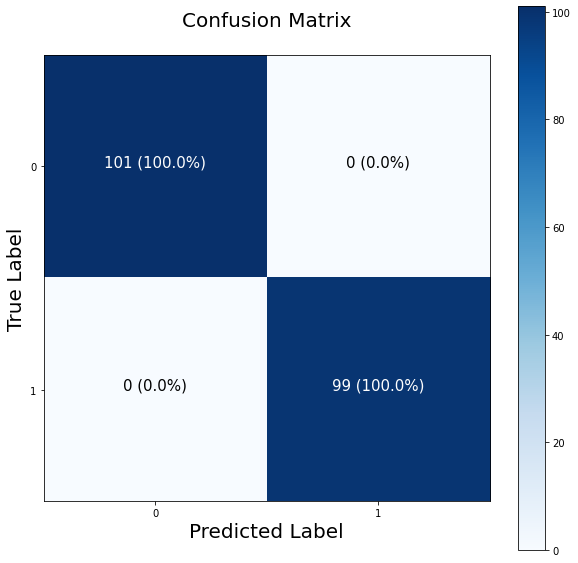

In [65]:
# Note: the cofusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create clases
classes = False
if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)
# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's know as **multi-class classification**.
* This means if you have 3 different classes, it's multi-class classification
* It also means if you have 100 different classes, it's multi-class classification.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.



In [66]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [67]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [68]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

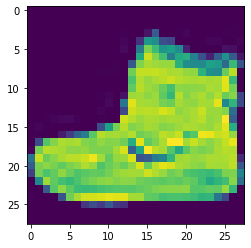

In [69]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [70]:
# Check out samples label
train_labels[0]

9

In [71]:
# Create a small list so we can index onto our training labels so they're human-readable

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Dress')

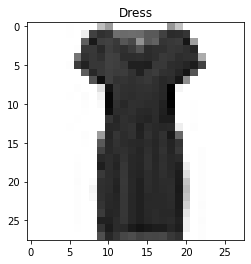

In [72]:
# Plot an example image and its label
index_of_choice = 20
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

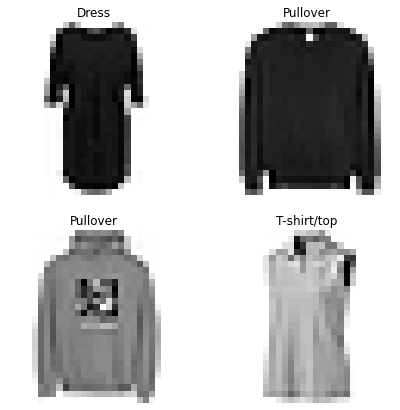

In [73]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For our mult-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:

* Input shape = 28 x 28
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrosstentrophy()
* Output layer activation = Softmax (not sigmoid)

In [74]:
# our data needs to be flattened (28*28 to None, 784)
# flattens our data into one long vector 
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [75]:
# CategoricalCrossentropy expects our labels to be represented in one hot representation, but our labels are in integer format
# Try SparseCategoricalCrossentropy()
# to conver to onehot -> tf.one_hot(train_labels, depth=10)
# will have to do the same for validation -> tf.one_hot(test_labels, depth=10))

In [76]:
# Set random seed
tf.random.set_seed(42)

# Create the model 
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 2.3220 - accuracy: 0.0972 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accurac

In [77]:
# Check the model summary
model_11.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 4)                 3140      
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
 dense_28 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [78]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1.

In [79]:
# We can get our training and test data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [80]:
# Now our data is normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# Create the model 
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1553 - accuracy: 0.6078 - val_loss: 0.8584 - val_accuracy: 0.7270
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7416 - accuracy: 0.7660 - val_loss: 0.6933 - val_accuracy: 0.7722
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6177 - accuracy: 0.7918 - val_loss: 0.6316 - val_accuracy: 0.7835
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5740 - accuracy: 0.8041 - val_loss: 0.5947 - val_accuracy: 0.7989
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5525 - accuracy: 0.8087 - val_loss: 0.5889 - val_accuracy: 0.8004
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5377 - accuracy: 0.8139 - val_loss: 0.5846 - val_accuracy: 0.7958
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5277 - accuracy: 0.8154 - val_loss: 0.5676 - val_accuracy:

**Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1).

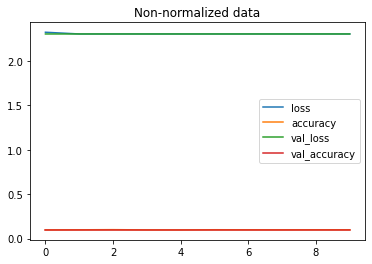

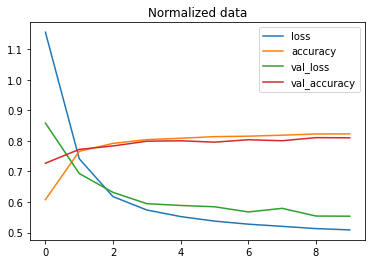

In [81]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

**Note:** The same model with even slightly different data can produce *dramatically* different results.  So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

## Finding the ideal learning rate

In [86]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                           train_labels,
                           epochs=40,
                           validation_data=(test_data_norm, test_labels),
                           callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 8s 3ms/step - loss: 1.3737 - accuracy: 0.5072 - val_loss: 0.9509 - val_accuracy: 0.6541 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8111 - accuracy: 0.7152 - val_loss: 0.7655 - val_accuracy: 0.7298 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6860 - accuracy: 0.7558 - val_loss: 0.6786 - val_accuracy: 0.7555 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6299 - accuracy: 0.7727 - val_loss: 0.6477 - val_accuracy: 0.7650 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6031 - accuracy: 0.7791 - val_loss: 0.6132 - val_accuracy: 0.7797 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5729 - accuracy: 0.8016 - val_loss: 0.6340 - val_accuracy: 0.7764 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

Text(0.5, 1.0, 'Finding the ideal learning rate')

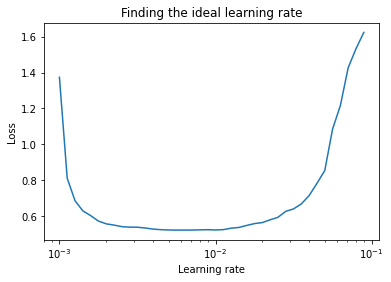

In [87]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [88]:
# Let's refit a model with the itdeal learning rate

# Set random seed
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# Fit the model
find_lr_history = model_14.fit(train_data_norm,
                           train_labels,
                           epochs=20,
                           validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 11s 4ms/step - loss: 1.8995 - accuracy: 0.2028 - val_loss: 1.7318 - val_accuracy: 0.2169
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5947 - accuracy: 0.2991 - val_loss: 1.2579 - val_accuracy: 0.4733
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9984 - accuracy: 0.5995 - val_loss: 0.7611 - val_accuracy: 0.7054
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6874 - accuracy: 0.7462 - val_loss: 0.6687 - val_accuracy: 0.7560
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6418 - accuracy: 0.7610 - val_loss: 0.6652 - val_accuracy: 0.7575
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6216 - accuracy: 0.7667 - val_loss: 0.6413 - val_accuracy: 0.7616
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6068 - accuracy: 0.7735 - val_loss: 0.6402 - val_accuracy

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evalaute its performance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

Let's go through the top 2...

In [90]:
# Create a confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_test, y_preds, classes=None, figsize=(10, 10), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_test, tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set label to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)
  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=text_size)

In [91]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [92]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) #probs is short for "prediction probabilities"

# View the first 5 predicitons
y_probs[:5]

313/313 [==============================] - 2s 5ms/step


array([[2.9360385e-09, 3.0250743e-17, 6.4671298e-12, 2.3744857e-09,
        1.7197946e-08, 3.7153471e-01, 3.9123140e-08, 3.1126052e-01,
        1.2704250e-04, 3.1707764e-01],
       [2.2514192e-04, 4.8528523e-07, 9.4052577e-01, 3.5678889e-07,
        1.5493093e-02, 5.5317648e-24, 4.3755166e-02, 0.0000000e+00,
        1.9058227e-08, 0.0000000e+00],
       [9.9298243e-11, 9.9992269e-01, 6.7616570e-06, 3.4531574e-06,
        6.7008754e-05, 1.1322506e-19, 1.4475214e-08, 2.7549016e-21,
        4.0348896e-14, 1.8177736e-24],
       [2.8372673e-09, 9.9978566e-01, 1.4221335e-05, 6.4277396e-05,
        1.3572053e-04, 1.1552104e-15, 1.2127489e-07, 4.6950803e-16,
        3.7309348e-12, 1.1676456e-17],
       [2.3862304e-01, 3.0738581e-04, 2.3996776e-01, 5.3897288e-02,
        3.4348249e-02, 9.1742841e-08, 4.3110183e-01, 2.2163115e-14,
        1.7543545e-03, 2.6408121e-20]], dtype=float32)

**Note:** Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you'll want to make predicitons on normalized data).

In [94]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([2.9360385e-09, 3.0250743e-17, 6.4671298e-12, 2.3744857e-09,
        1.7197946e-08, 3.7153471e-01, 3.9123140e-08, 3.1126052e-01,
        1.2704250e-04, 3.1707764e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=5>,
 'Sandal')

In [95]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([5, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [97]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[773,   0,  12, 111,   4,   2,  87,   0,  11,   0],
       [  0, 946,   8,  37,   7,   0,   2,   0,   0,   0],
       [ 18,   8, 601,  25, 203,   1, 140,   0,   4,   0],
       [ 33,  22,  15, 855,  31,   2,  38,   1,   3,   0],
       [  1,  10,  72,  36, 780,   0,  93,   0,   8,   0],
       [  0,   0,   0,   5,   0, 874,   0,  61,  23,  37],
       [210,   4,  79,  88, 136,   0, 468,   0,  15,   0],
       [  0,   0,   0,   0,   0,  54,   0, 922,   0,  24],
       [  3,   0,   1,  12,   9,  15,  45,   7, 908,   0],
       [  0,   0,   0,   0,   0,  29,   0,  65,   1, 905]])

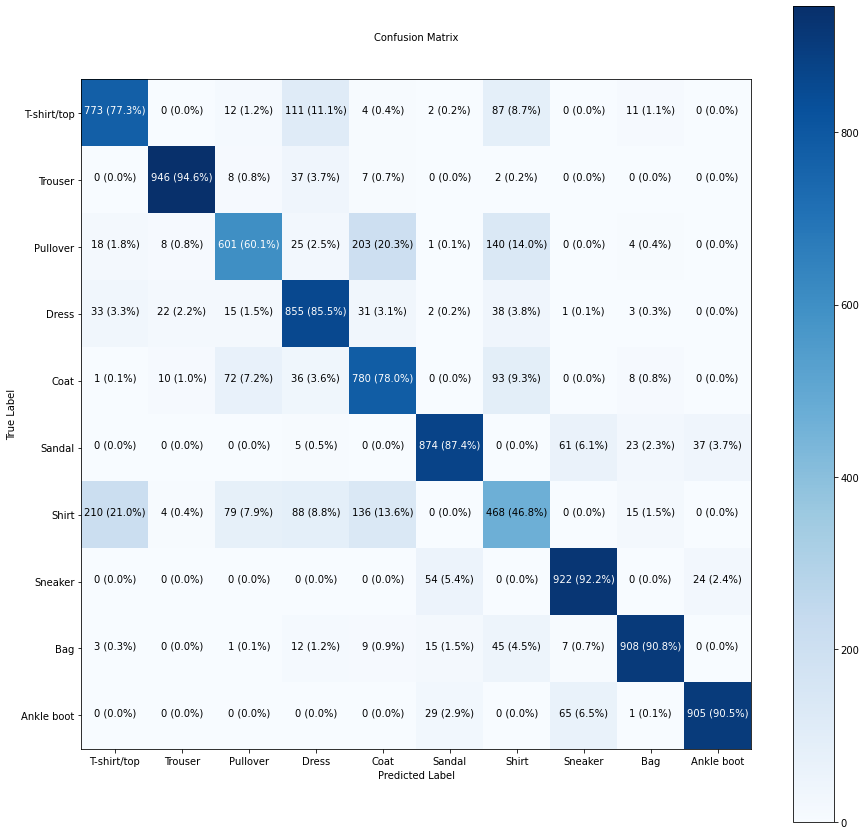

In [98]:
# Make a prettier confusion matrix
make_confusion_matrix(y_preds=y_preds,
                      y_test=test_labels,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

**Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your model.

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [103]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a ranom image, plots it and labels it with a prediciton and truth label.
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (predictions/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # Set the color to green or red based on if prediction is right or wrong

1/1 [==============================] - 0s 65ms/step


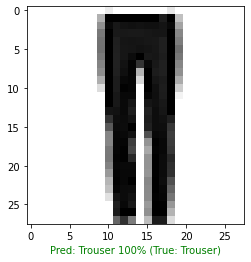

In [105]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning?

In [106]:
# Find the layers of our most recent model
model_14.layers

In [107]:
# Extract a particular layer
model_14.layers[1]

In [108]:
# Get the patterns of a layer in out network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[-0.21920043,  0.00159435, -0.14717701, -0.06107609],
        [-0.19724837, -0.20937356, -0.54463845, -0.00187626],
        [-0.30554852, -0.98986804,  0.5951192 ,  0.02285789],
        ...,
        [-0.05000089, -0.40619776, -0.01235717,  0.06463167],
        [ 0.30912426,  0.0473806 , -0.37456372, -0.05314677],
        [-0.38062254, -0.11688478, -0.0253847 ,  0.06730032]],
       dtype=float32), (784, 4))

In [109]:
28 * 28

784

In [110]:
model_14.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_47 (Dense)            (None, 4)                 3140      
                                                                 
 dense_48 (Dense)            (None, 4)                 20        
                                                                 
 dense_49 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now let's check out the bias vector...

In [112]:
# Bias and biases shapes
biases, biases.shape

(array([ 0.21410398,  1.9374758 ,  1.5347264 , -0.02686269], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector get initialized as zeros (at least in the case of a TensorFlow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [113]:
model_14.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_47 (Dense)            (None, 4)                 3140      
                                                                 
 dense_48 (Dense)            (None, 4)                 20        
                                                                 
 dense_49 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


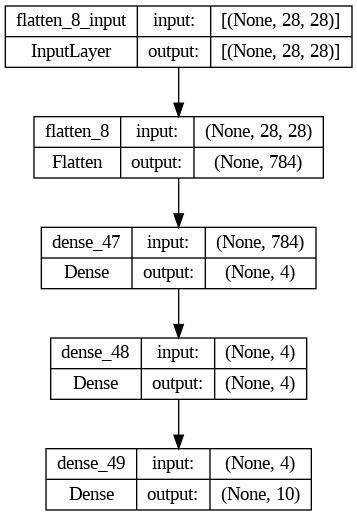

In [114]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)